In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv2
import os
import ast
import random
import matplotlib.patches as patches

In [2]:
PROJ_PATH = r"C:\Users\siddh\Desktop\Global-Wheat-Detection-main\Global wheat detection"
PIC_PATH = os.path.join(PROJ_PATH, 'train')

In [3]:
df = pd.read_csv(os.path.join(PROJ_PATH, 'train.csv'))
print(df.head())

    image_id  width  height                         bbox   source
0  b6ab77fd7   1024    1024   [834.0, 222.0, 56.0, 36.0]  usask_1
1  b6ab77fd7   1024    1024  [226.0, 548.0, 130.0, 58.0]  usask_1
2  b6ab77fd7   1024    1024  [377.0, 504.0, 74.0, 160.0]  usask_1
3  b6ab77fd7   1024    1024  [834.0, 95.0, 109.0, 107.0]  usask_1
4  b6ab77fd7   1024    1024  [26.0, 144.0, 124.0, 117.0]  usask_1


In [4]:
print(df.isnull().sum())

image_id    0
width       0
height      0
bbox        0
source      0
dtype: int64


In [5]:
# Checking for unique values in the dataframe
def unique_val(data):
    return f"No. of unique values : {len(data.unique())}"
for i in df.columns:
    print(f"{i} : {unique_val(df[i])}")

image_id : No. of unique values : 3373
width : No. of unique values : 1
height : No. of unique values : 1
bbox : No. of unique values : 147761
source : No. of unique values : 7


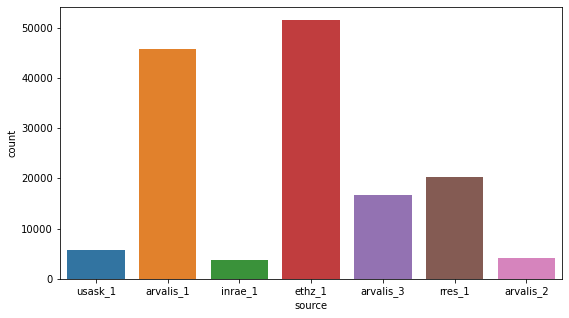

In [6]:
plt.figure(figsize=(9, 5))
sns.countplot(df.source)
plt.show()

In [7]:
unique_image_id = len(df['image_id'].unique())
path = 'train'
images_no = len(os.listdir(os.path.join(PROJ_PATH, path)))

print(f"Number of images without wheat : {images_no - unique_image_id}")

Number of images without wheat : 49


In [8]:
print(type(df['bbox'][0]))

<class 'str'>


So we've to change the data type to list when we're going to use the wheat-head's co ordinates

In [9]:
df.bbox = df.bbox.apply(ast.literal_eval)
df = df.groupby("image_id")["bbox"].apply(list).reset_index(name="bboxes")

In [10]:
print(df.head())

    image_id                                             bboxes
0  00333207f  [[0, 654, 37, 111], [0, 817, 135, 98], [0, 192...
1  005b0d8bb  [[765.0, 879.0, 116.0, 79.0], [84.0, 539.0, 15...
2  006a994f7  [[437.0, 988.0, 98.0, 36.0], [309.0, 527.0, 11...
3  00764ad5d  [[89.0, 256.0, 113.0, 107.0], [216.0, 282.0, 1...
4  00b5fefed  [[709.0, 97.0, 204.0, 105.0], [775.0, 250.0, 1...


In [11]:
images = os.listdir(os.path.join(PROJ_PATH, path))

def plot(path, plot_style, num):
    img_id = [x for x in (random.sample(range(len(images)), num))]
    for k in img_id:
        co_ord = df.iloc[k]['bboxes']
        img_id = df.iloc[k]['image_id']
        img = plt.imread(os.path.join(PROJ_PATH, path, img_id+'.jpg'))
        figure, ax = plt.subplots(1)
        if plot_style == 'box':
            for i in co_ord:
                boxed_img = img
                x, y, w, h = i
                rect = patches.Rectangle((x, y), w, h,edgecolor='r', 
                                         facecolor="none")
                ax.add_patch(rect)
                plt.title(f"Image ID : {img_id}")
                plt.imshow(boxed_img)
        else:
            plt.title(f"Image ID : {img_id}")
            ax.imshow(img)
            

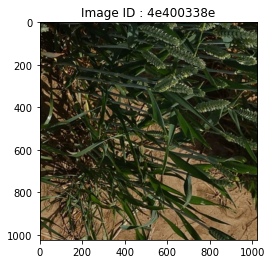

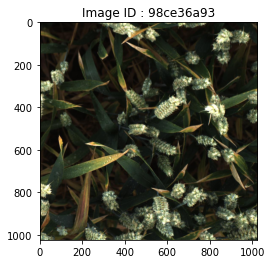

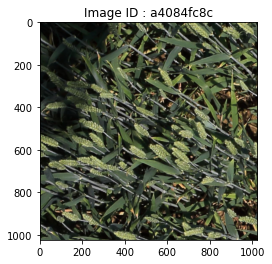

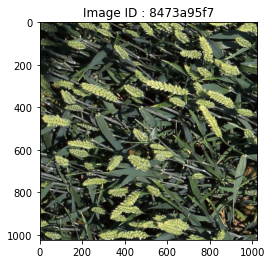

In [12]:
plot(PIC_PATH, plot_style='normal', num=4)

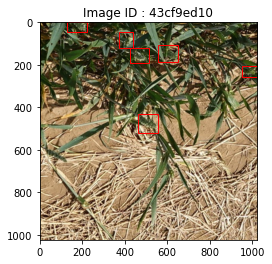

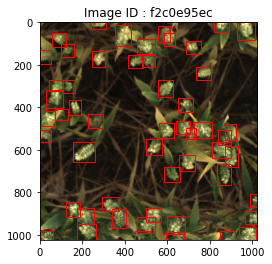

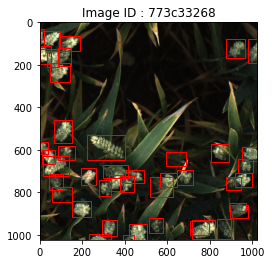

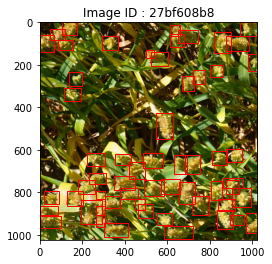

In [13]:
plot(PIC_PATH, plot_style='box',num=4)

<AxesSubplot:xlabel='bboxes', ylabel='Density'>

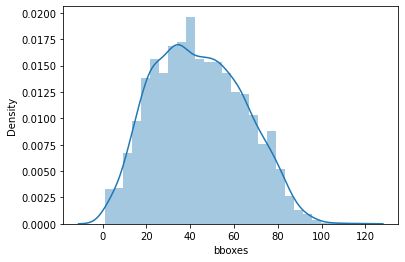

In [14]:
sns.distplot(df['bboxes'].apply(len))